In [5]:
import pandas as pd
import os


# task1 : merge the 12 months of sales data into a single csv file 

In [10]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir('./Sales_Data')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data5.csv",index=False)    

In [11]:
all_data=pd.read_csv("all_data5.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# CLEAN UP THE DATA

# DROP ROWS OF NAN

In [12]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


find or and delete it

In [14]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

convert column to the correct type

In [15]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])#make float

# Augment data with additional columns

# Task2:Add Month Column

In [16]:
all_data['Month']=all_data['Order Date'].str[0:2]##in this we convert the string of orderdate to month format

all_data['Month']=all_data['Month'].astype('int32')##in this we convert the month column from string type to int type
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# add city column

In [17]:


all_data['City']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta


# add a sales column

In [18]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,New York City,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,New York City,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,New York City,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,San Francisco,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,Atlanta,11.95


# # what was the best month for sales? how much was earned that month?

In [19]:
all_data.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Sales
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",Dallas New York City New York City San Franci...,1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",Portland San Francisco New York City Atlanta ...,2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",San Francisco Portland San Francisco San Fran...,2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",Dallas Boston Los Angeles Los Angeles Los Ang...,3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",Portland San Francisco Boston Boston San Fran...,3152606.75
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",San Francisco Dallas San Francisco San Franci...,2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",Atlanta Seattle Atlanta Atlanta Seattle San F...,2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",Seattle Dallas Portland Los Angeles New York ...,2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",San Francisco San Francisco Seattle San Franc...,2097560.13


In [20]:
results=all_data.groupby('Month').sum()

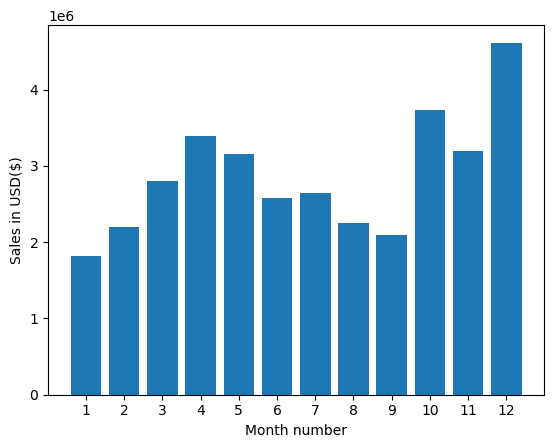

In [21]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

# which city has the highest sale 

In [22]:
result=all_data.groupby('City').sum()
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58
Austin,2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75
Boston,2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01
Dallas,2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40
Los Angeles,2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80
New York City,2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43
Portland,2956712956822956862957342957572957972958192958...,USB-C Charging CableUSB-C Charging CableUSB-C ...,14053,2307747.47,12/16/19 15:1012/23/19 19:2512/17/19 16:1012/2...,"928 12th St, Portland, OR 97035780 Elm St, Por...",87765,2320490.61
San Francisco,2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91
Seattle,2956902956992957152957212957652957662957842957...,Apple Airpods HeadphonesAA Batteries (4-pack)U...,16553,2733296.01,12/04/19 00:4412/17/19 18:3212/17/19 18:2012/0...,"174 Cedar St, Seattle, WA 98101162 Maple St, S...",104941,2747755.48


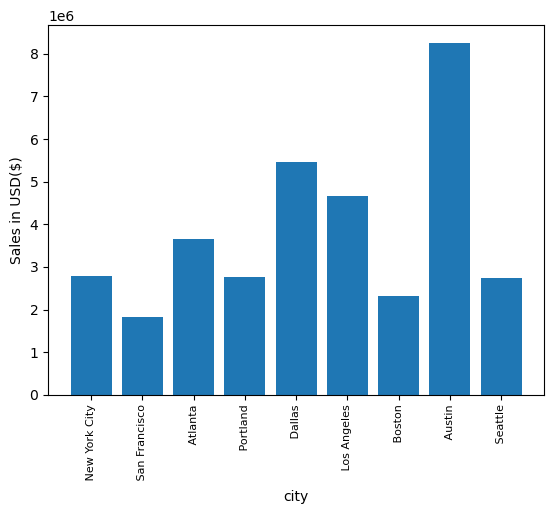

In [23]:
import matplotlib.pyplot as plt
cities=all_data['City'].unique()
plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.xlabel('city')
plt.show()

# what time should we display advertisements to maximize likelihood of customers buying product?

In [26]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date']) 

In [28]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,1700.00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,11.95,12,38


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


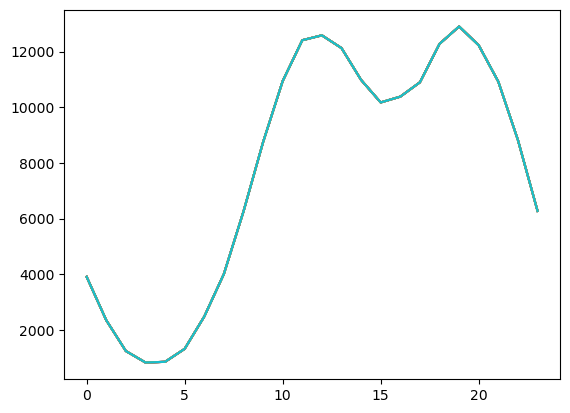

In [32]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())

all_data.groupby(['Hour']).count()

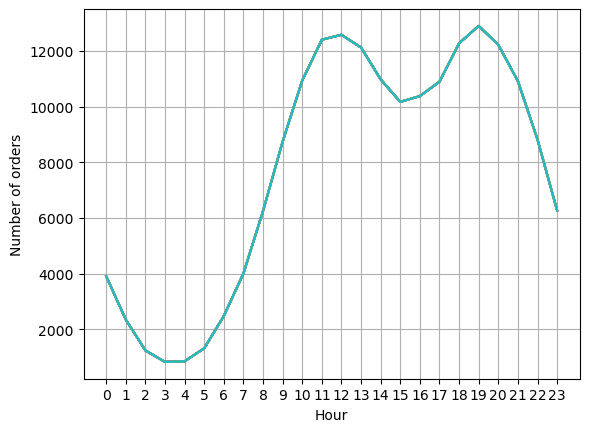

In [35]:
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

# what products are most often sold together

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,1700.00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,11.95,12,38


In [37]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,600.00,12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,11.95,12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,99.99,12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,11.99,12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,New York City,400.00,14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,New York City,23.90,14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,Austin,3.84,12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,Austin,99.99,12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,Boston,700.00,14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,Boston,14.95,14,49


In [38]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

/var/folders/lc/9ckz_dfx1_bf9zb99q73v2500000gn/T/ipykernel_1346/586965833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,600.00,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,11.95,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,99.99,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,Boston,11.99,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,New York City,400.00,14,32,"Vareebadd Phone,USB-C Charging Cable"


In [39]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [40]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# what product sold the most? why do you think it sold the most?

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,1700.00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,11.95,12,38


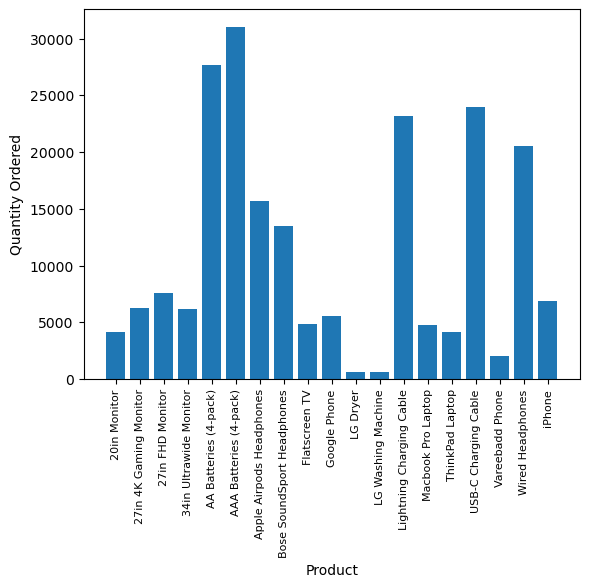

In [58]:
 
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']#numeric_only is very imp for ignoring strig val

products=[product for product,df in product_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

/var/folders/lc/9ckz_dfx1_bf9zb99q73v2500000gn/T/ipykernel_1346/2742315034.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


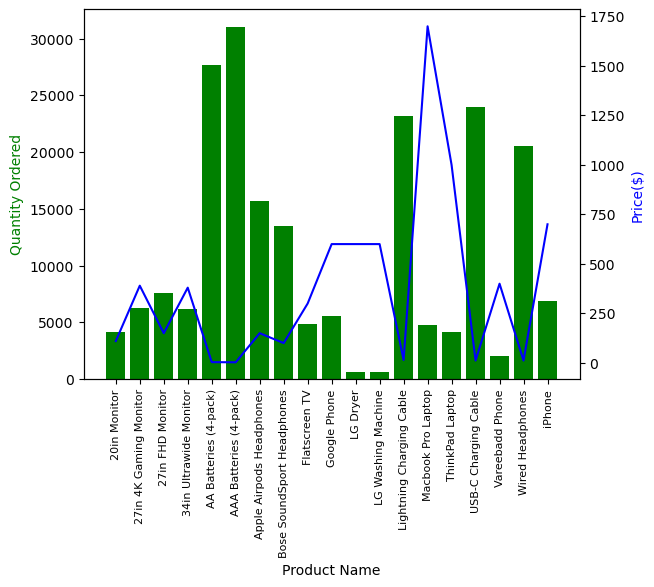

In [60]:
prices=all_data.groupby('Product').mean(numeric_only=True)['Price Each']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()